# Hücre 1: kütüphaneler + veri yükleme + hızlı inceleme

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("C:\\Users\\Rayiha\\Desktop\\lecture3\\train.csv")
test  = pd.read_csv("C:\\Users\\Rayiha\\Desktop\\lecture3\\test.csv")

# Hızlı bakış
print('Train shape:', train.shape)
print('Test shape :', test.shape)
print('\nColumns and dtypes:\n', train.dtypes)
print('\nFirst 5 rows:')
display(train.head(10))

# Eksik değer özeti
print('\\nMissing values in train:')
print(train.isnull().sum().sort_values(ascending=False))

Train shape: (891, 12)
Test shape : (418, 11)

Columns and dtypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


\nMissing values in train:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


Açıklama (neye bakıyoruz):

shape ile kaç satır/sütun var.

dtypes hangi sütunların sayısal / kategorik olduğuna bakmamızı sağlar.

isnull().sum() bize hangi sütunlarda eksik veri olduğunu ve ne kadar olduğunu gösterir (sonraki adımda bu sütunlara karar vereceğiz).

# Hücre 2: Basit EDA - Survival oranları

Overall survival rate: 38.38%
\nSurvival by sex:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

\nSurvival by Pclass:


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

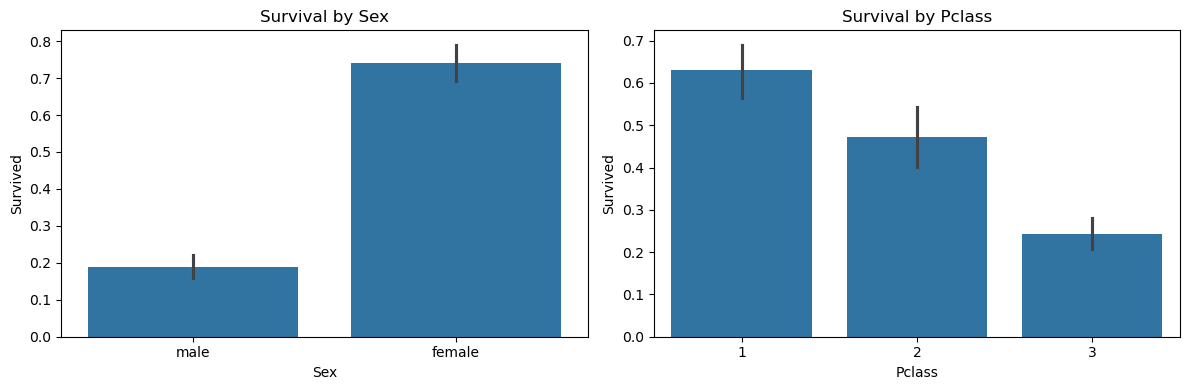

In [5]:
print('Overall survival rate: {:.2%}'.format(train['Survived'].mean()))
print('\\nSurvival by sex:')
display(train.groupby('Sex')['Survived'].mean())

print('\\nSurvival by Pclass:')
display(train.groupby('Pclass')['Survived'].mean())

# Görselleştirme: Sex ve Pclass'a göre survival bar plot
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x='Sex', y='Survived', data=train, ax=axes[0]).set_title('Survival by Sex')
sns.barplot(x='Pclass', y='Survived', data=train, ax=axes[1]).set_title('Survival by Pclass')
plt.tight_layout()
plt.show()

# Hücre 3 — Eksik Değer Analizi + Strateji

In [7]:
missing = train.isnull().sum().sort_values(ascending=False)
print("Eksik Değer Sayıları:\n")
print(missing)

# Eksik oranlarını da görelim
missing_percent = (train.isnull().sum() / len(train) * 100).sort_values(ascending=False)
print("\nEksik Değer Yüzdeleri (%):\n")
print(missing_percent)

Eksik Değer Sayıları:

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Eksik Değer Yüzdeleri (%):

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64


<!-- # Bu hücrede göreceğin şey:

# Cabin ~ 77% eksik → çoğu yerde drop edilir veya harfe indirgenir.

# Age ~ 19% eksik → en kritik kısım → Title bazlı median ile doldurmak en iyi yöntem.

# Embarked 2 tane eksik → mode ile doldur.

# Fare 1 tane eksik (genelde testte) → median ile doldur. -->

### Bu hücrede göreceğin şey:

### Cabin ~ 77% eksik → çoğu yerde drop edilir veya harfe indirgenir.

### Age ~ 19% eksik → en kritik kısım → Title bazlı median ile doldurmak en iyi yöntem.

### Embarked 2 tane eksik → mode ile doldur.

### Fare 1 tane eksik (genelde testte) → median ile doldur.

# Hücre 4 — Title çıkarımı

### Bu, Age’i doğru doldurabilmemiz için önce Name’den Title çıkarmamız gerekiyor.
### Ken Jee de aynısını yapıyor. (Mr, Mrs, Miss, Master, Rare titles…)

In [9]:
def extract_title(name):
    if pd.isna(name):
        return "Unknown"
    # Isim formatı: "Lastname, Title. Firstname"
    title_part = name.split(",")[1]
    title = title_part.split(".")[0].strip()
    return title

# Train + Test birlikte yapıyoruz
for df in [train, test]:
    df["Title"] = df["Name"].apply(extract_title)

print(train["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


### Bu hücreden sonra:

### Kaç çeşit title olduğunu göreceksin.

### Rare title’lar küçük sayıdadır ve birleştirilmesi gerekir (aşağıdaki adımda yapacağız).

# Hücre 5 — Title temizleme, Rare sınıfları birleştirme

In [11]:
rare_titles = ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir',
               'Jonkheer','Dona']

def clean_title(t):
    if t in ["Mlle", "Ms"]:
        return "Miss"
    if t == "Mme":
        return "Mrs"
    if t in rare_titles:
        return "Rare"
    return t

for df in [train, test]:
    df["Title"] = df["Title"].apply(clean_title)

print(train["Title"].value_counts())

Title
Mr              517
Miss            185
Mrs             126
Master           40
Rare             22
the Countess      1
Name: count, dtype: int64


# Hücre 6 — Age imputasyonu (Title median)

In [13]:
# Her Title için median Age hesapla
age_medians = train.groupby("Title")["Age"].median()

def fill_age(row):
    if pd.isna(row["Age"]):
        return age_medians[row["Title"]]
    return row["Age"]

for df in [train, test]:
    df["Age"] = df.apply(fill_age, axis=1)

print("Kalan Age NA sayısı:", train["Age"].isnull().sum())

Kalan Age NA sayısı: 0


# Hücre 7 — Embarked doldurma (mode)

In [15]:
most_common_embarked = train["Embarked"].mode()[0]

for df in [train, test]:
    df["Embarked"] = df["Embarked"].fillna(most_common_embarked)

print("Kalan Embarked NA:", train["Embarked"].isnull().sum())

Kalan Embarked NA: 0


# HÜCRE 9 — Cabin Sadeleştirme + CabinLetter Oluşturma

### Cabin %77 eksik → direkt kullanamayız.

#### Ama ilk harf (A, B, C, D, E, F, G, T) sınıfla ilişkilidir → iyi bir feature’dır.
#### Eksikleri "M" (Missing) ile temsil edeceğiz.

In [17]:
# Hücre 9 — Cabin temizliği ve CabinLetter çıkarımı

for df in [train, test]:
    df["Cabin"] = df["Cabin"].fillna("Missing")
    df["CabinLetter"] = df["Cabin"].apply(lambda x: x[0] if x != "Missing" else "M")

print(train["CabinLetter"].value_counts())


CabinLetter
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


# Hücre 10 — FamilySize ve IsAlone

In [21]:
for df in [train, test]:
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

train[["SibSp","Parch","FamilySize","IsAlone"]].head(10)


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1
5,0,0,1,1
6,0,0,1,1
7,3,1,5,0
8,0,2,3,0
9,1,0,2,0


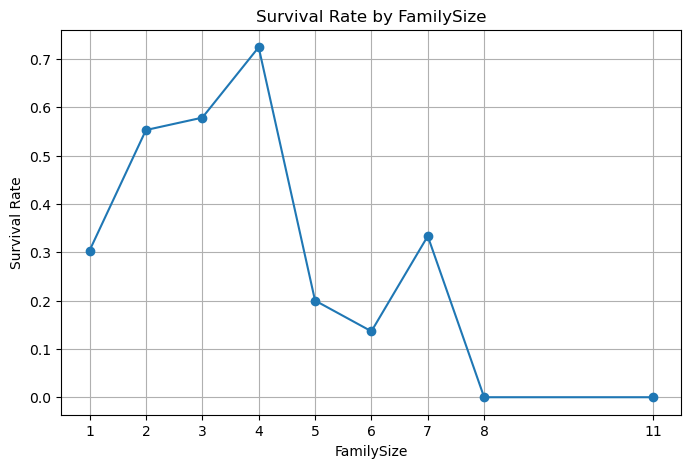

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Rayiha\\Desktop\\lecture3\\train.csv")
# FamilySize oluşturma
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# FamilySize'a göre hayatta kalma oranları
survival_rates = df.groupby('FamilySize')['Survived'].mean()

# Grafik
plt.figure(figsize=(8,5))
plt.plot(survival_rates.index, survival_rates.values, marker='o')
plt.title('Survival Rate by FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.xticks(survival_rates.index)

plt.show()


## 🔹 FareBand – Ücretin Kategorilere Ayrılması

Titanic veri setinde ücret dağılımı oldukça geniştir ve bir çok model için ham `Fare` değerlerini kullanmak yerine kategorilere ayırmak daha iyi sonuç verir.

Burada:
- `Fare` değerini **4 eşit parçaya bölerek** (quartile-based) `FareBand` adında yeni bir özellik oluşturuyoruz.
- Train seti üzerinden oluşturulan sınırları (`bins`) kaydedip test setine de aynı şekilde uyguluyoruz.

Bu adım Ken Jee'nin feature engineering pipeline'ında önemli bir yer tutuyor.


In [25]:
# FareBand kategorileri oluşturma
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[0,1,2,3])

# Aynı dönüşümü test setine uygulamak için sınırları alıyoruz
fare_bins = pd.qcut(train['Fare'], 4, retbins=True)[1]

test['FareBand'] = pd.cut(test['Fare'], bins=fare_bins, labels=[0,1,2,3], include_lowest=True)

train[['Fare', 'FareBand']].head(10)


,Fare,FareBand
0,7.2500,0
1,71.2833,3
2,7.9250,1
3,53.1000,3
4,8.0500,1
5,8.4583,1
6,51.8625,3
7,21.0750,2
8,11.1333,1
9,30.0708,2


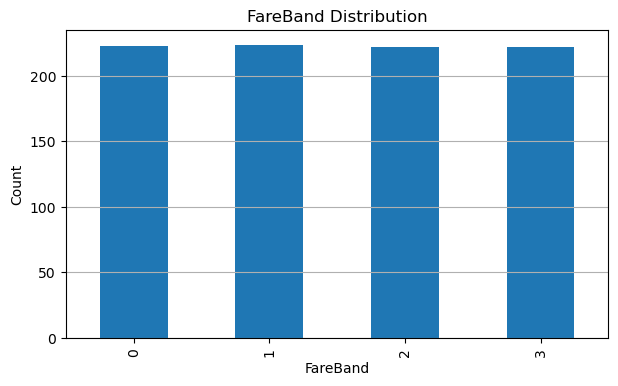

In [27]:
train['FareBand'].value_counts().sort_index().plot(kind='bar', figsize=(7,4))
plt.title('FareBand Distribution')
plt.xlabel('FareBand')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

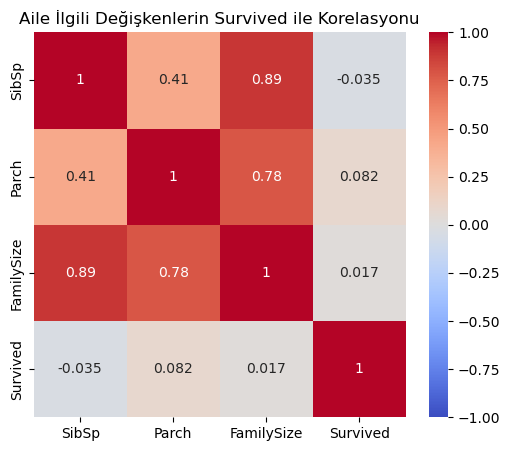

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(df[["SibSp", "Parch", "FamilySize", "Survived"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Aile İlgili Değişkenlerin Survived ile Korelasyonu")
plt.show()


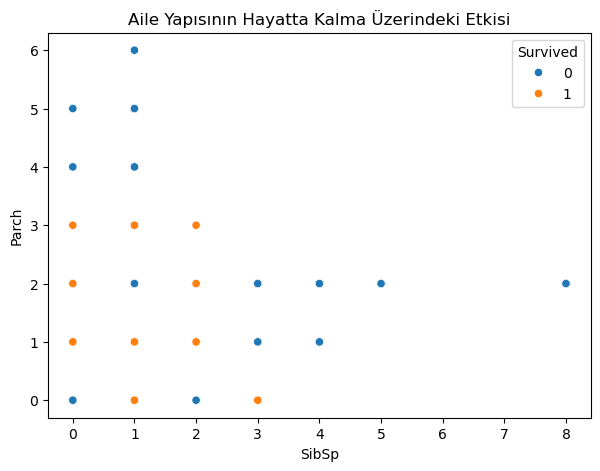

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="SibSp", y="Parch", hue="Survived")
plt.title("Aile Yapısının Hayatta Kalma Üzerindeki Etkisi")
plt.show()


In [33]:
def family_type(size):
    if size == 1:
        return "Alone"
    elif size <= 4:
        return "Small Family"
    else:
        return "Large Family"

df["FamilyType"] = df["FamilySize"].apply(family_type)

family_type_survival = df.groupby("FamilyType")["Survived"].mean() * 100
family_type_survival


FamilyType
Alone           30.353818
Large Family    16.129032
Small Family    57.876712
Name: Survived, dtype: float64

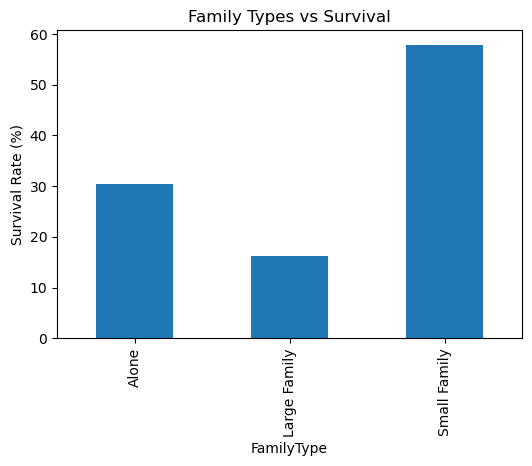

In [35]:
family_type_survival.plot(kind="bar", figsize=(6,4))
plt.ylabel("Survival Rate (%)")
plt.title("Family Types vs Survival")
plt.show()